In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/shakyadissanayake/oily-dry-and-normal-skin-types-dataset')

100%|██████████| 124M/124M [00:01<00:00, 96.2MB/s]


In [ ]:
from fastai.vision.all import *

In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.0 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
pth='/content/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train'

In [ ]:
len(get_image_files(pth))

2756

In [ ]:
image_categories = os.listdir(pth)
print(image_categories)

['oily', 'normal', 'dry']


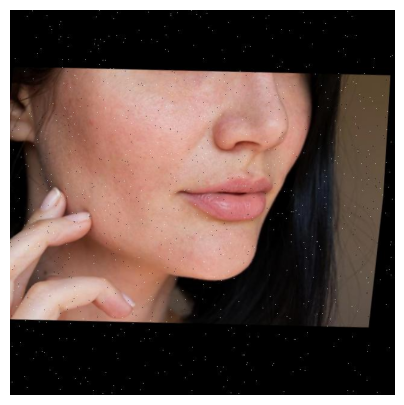

In [ ]:
img = PILImage.create('/content/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/train/dry/dry_003e3600c061a59dc809_jpg.rf.0883c212d94c22da47d6b24dd94c3ded.jpg')
img.show();

In [ ]:
def GetLabel(fileName):
 return fileName.split('_')[0]

In [ ]:
GetLabel('dry_003e3600c061a59dc809_jpg.rf.0883c212d94c22da47d6b24dd94c3ded.jpg')

'dry'

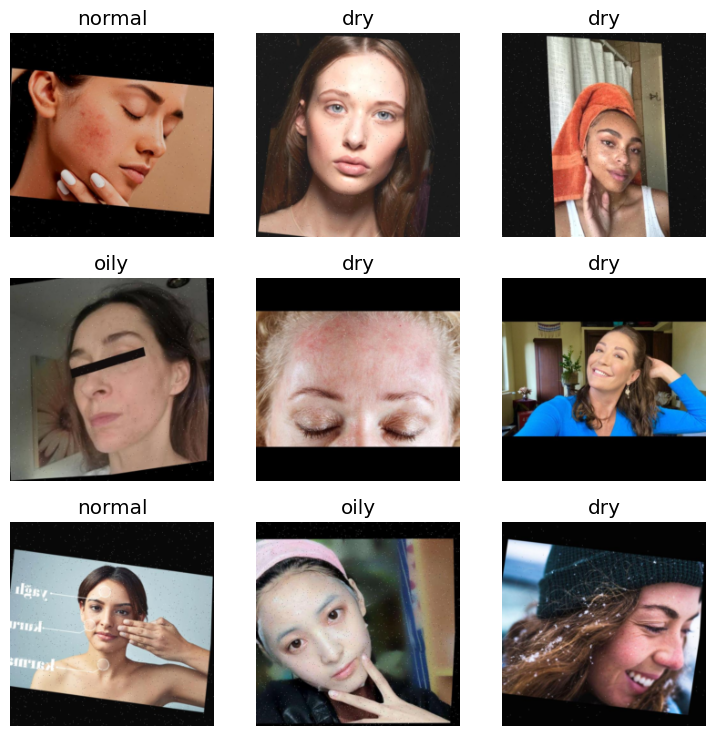

In [ ]:
dls = ImageDataLoaders.from_name_func(
    pth, get_image_files(pth), valid_pct=0.2, seed=42,
    label_func=GetLabel, item_tfms=Resize(224))

dls.train.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=20)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 100MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.780281,1.079992,0.460980,00:35


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,1.069339,0.796010,0.332123,00:28
1,0.769587,0.625080,0.263158,00:25
2,0.523140,0.522310,0.217786,00:24
3,0.351864,0.542779,0.194192,00:25
4,0.239365,0.500828,0.185118,00:26
5,0.181226,0.599722,0.174229,00:26
6,0.141403,0.676041,0.174229,00:26
7,0.132330,0.520181,0.147005,00:23
8,0.108455,0.700272,0.190563,00:25
9,0.089750,0.530396,0.134301,00:25


In [ ]:
import os
from torchvision.datasets import ImageFolder

In [ ]:
test_dataset_dir='/content/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/test'

In [ ]:
test_dataset = ImageFolder(root=test_dataset_dir)

In [ ]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 134
    Root location: /content/oily-dry-and-normal-skin-types-dataset/Oily-Dry-Skin-Types/test

In [ ]:
dls = ImageDataLoaders.from_name_func(
    pth, get_image_files(test_dataset_dir), valid_pct=0.2, seed=42,
    label_func=GetLabel, item_tfms=Resize(224))


In [ ]:
!pip install gradio

In [ ]:
import gradio as gr


In [ ]:
from fastai.vision.all import PILImage


In [ ]:
def predict_image(learn, img):

  prediction, _, _ = learn.predict(img)
  return f"Predicted Class: {pediction}"

In [ ]:
from fastai.vision.all import *

def make_prediction(learn, img_path):
    img = PILImage.create(img_path)
    prediction, _, _ = learn.predict(img)
    return prediction


In [ ]:
img_pth='/content/your-skin-type-oily.jpg'

In [ ]:

prediction = make_prediction(learn, img_pth)
print("Predicted class label:", prediction)



Predicted class label: oily


Please enter the URL of the image: https://www.skinclinicblyss.com.au/wp-content/uploads/2022/07/your-skin-type-oily.jpg


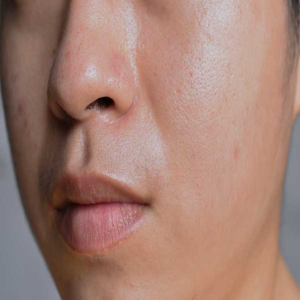



 Predicted skin type: normal


In [ ]:
import requests
from PIL import Image as PILImage
from io import BytesIO
from IPython.display import display
def predict_and_display_image(url, learn):

    try:
        response = requests.get(url)
        response.raise_for_status()


        img = PILImage.open(BytesIO(response.content))
        img = img.resize((300, 300))

        display(img)

        label, _, probs = learn.predict(img)
        print(f"\n\n Predicted skin type: {label}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

url = input("Please enter the URL of the image: ")
predict_and_display_image(url, learn)
